<div align="center"> 
 <span style="font-size:1.5em; font-family:Times New Roman">РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ</span> <br/>
    <span style="font-size:1.2em; font-family:Times New Roman">Факультет физико-математических и естественных наук</span> <br/>
    <span style="font-size:1.2em; font-family:Times New Roman">Кафедра прикладной информатики и теории вероятностей</span>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
     <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
     <br/>
    <br/>
    <br/>
    <br/>
    
</div>

<div align="center"><span style="font-size:1em; font-family:Times New Roman"> </span></div>


<div align="center">
    <span style="font-size:1.5em; font-family:Times New Roman">ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №6</span>
    <br/><br/>
    <span style="font-size:1.5em; font-family:Times New Roman"> Построение общей модели на основе случайных полей <br/> и статической модели блокировки </span>
    <br/>
    <br/>
    <br/>
    <span style="font-size:1.2em; font-family:Times New Roman"> Дисциплина: Моделирование беспроводных сетей</span>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
</div>





<div align="left">
    <span style="font-size:1.5em; font-family:Times New Roman">Студент: Кейела Патачона </span>
    <br/>
    <span style="font-size:1.5em; font-family:Times New Roman">Группа: Нпммд-02-21 </span>
    <br/>
    <span style="font-size:1.5em; font-family:Times New Roman">Преподаватель: Бегишев В.О.</span>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
     <br/>
    <br/>
    <br/>
    <br/>
    <br/>
</div>



                                   



                                     



<div align="center">
    <span style="font-size:1.5em; font-family:Times New Roman">МОСКВА</span>
    <br/>
    <span style="font-size:1.4em; font-family:Times New Roman">2021 г.</span>
    <br/>
     <br/>
    <br/>
    <br/>
    <br/>
    <br/>
</div>





# Цель: 

<span style="font-size:1.25em; font-family:Times New Roman">1. Ознакомление с общей моделью на основе случайных полей и статической модели блокировки. </span>


## Задание:

<span style="font-size:1.25em; font-family:Times New Roman">
    В круге радиуса R, центром которого является целевой приемник, 
распределены согласно Пуассоновскому равномерному точечному процессу с 
интенсивностью B интерферирующие устройства. На целевом приемнике 
расположена всенаправленная антенна, а интерферирующие устройства 
оборудованы направленными антеннами с углом диаграммы направленности γ. 
Предполагается, что все антенны сориентированы случайным образом и постоянно 
излучают сигнал с мощностью P. При этом применяется модель распространения 
сигнала Cone (аналог модели Free Space Path Loss с поправкой на коэффициент 
диаграммы направленности). В этом же круге согласно Пуассоновскому 
равномерному точечному процессу с интенсивностью A распределены 
блокирующие объекты радиуса D. Для упрощения интерферирующие устройства не 
считать блокирующими объектами.
В случае если сигнал от интерферирующего передатчика до целевого 
приемника проходит через блокирующий объект, то он не создает помех на целевом 
приемнике. Аналогично, если целевой приемник не попадает в сектор диаграммы 
направленности интерферирующего передатчика, то соответствующий 
интерферирующий сигнал тоже не создает помех.
На основе полученной модели построить графики среднего значения 
интерференции как функции от направленности антенн γ, интенсивности 
Пуассоновского поля источников интерферирующих устройств B, интенсивности 
Пуассоновского поля блокирующих объектов A. При построении графиков 
использовать как минимум 1000 реализаций. </span>


In [23]:
# Библиотеки
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

## Нужные нам функции

In [24]:

def plot_circle(x,y,r): #функция отрисовки круга
    angles=np.linspace(0,2*np.pi,50)
    x_cir=x+r*np.cos(angles)
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

def plot_zone(x,y,distance,angle,fixang):  #Функция отрисовки интерферирующих объектов
    x1=x+distance*np.cos(angle) #подсчёт координат направления сектора
    y1=y+distance*np.sin(angle) 
    x2=x+distance*np.cos(angle+fixang) 
    y2=y+distance*np.sin(angle+fixang) 
    plt.plot([x,x1],[y,y1], '-.b') # отрисовка лучей, иллюстрирующих сектор
    plt.plot([x,x2],[y,y2], '-.b') 

def poisson_point_process(lambda0,R,area_size): #функция инициализации пуасоновского распределения точек
    N = np.random.poisson(lambda0*area_size**2)
    x1=[]
    y1=[]
    while len(x1)!=N:
        x = np.random.uniform(0,area_size)
        y = np.random.uniform(0,area_size)
        if ((x-x0)**2+(y-y0)**2<=R*R):
            x1.append(x)
            y1.append(y)
    return x1,y1

## Начальные данные

In [28]:
guard_size = 10 #размер зоны
guard_radius=4 #радиус сигнала антенны
poisson_lam_block = 0.15 #интенсивность для распределения блокирующих устройств
poisson_lam_int = 0.1 #интенсивность для распределения интерферирующих устройств
radius = 0.2 #радиус блокирующих устройств
distance = 1 #длина луча для отрисовки сектора
fixang = np.pi/6 #угол сектора интерферирующих устройств
list_point=np.array #массив для дальнейшей функции

x0=guard_size/2 #координаты расположения антены
y0=guard_size/2

## Инициализазия

In [29]:
#инициализация бокирующих и интерферирующих устройств
x_block, y_block=poisson_point_process(poisson_lam_block, guard_radius, guard_size)
x_int, y_int=poisson_point_process(poisson_lam_int, guard_radius, guard_size)
angle1 = np.random.uniform(0,2*np.pi,size=len(x_int)) #массив углов поворота для каждого интерфирирующего устройства

#инициализация точек окружности – зоны сигнала антенны
circle_angels=np.linspace(0, 2*np.pi, 100)
circle_x=x0+guard_radius*np.cos(circle_angels)
circle_y=y0+guard_radius*np.sin(circle_angels)


## Графики

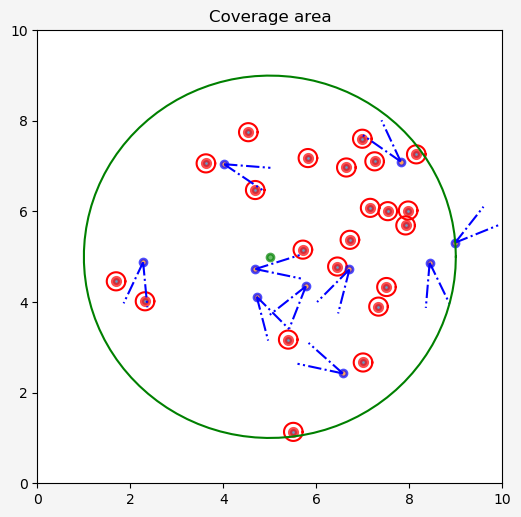

In [30]:
plt.figure(dpi=100, figsize=(6,6), facecolor='whitesmoke')
plt.title('Coverage area')
plt.plot(x_block,y_block,'.', alpha=0.7,label='fist',lw=5,mec='r',mew=3,ms=10)
for i in range(len(x_block)): #отрисовка блокирующих объектов
    plot_circle(x_block[i],y_block[i], radius)
plt.plot(x_int,y_int,'.', alpha=0.7,label='fist',lw=5,mec='b',mew=2,ms=10) 
for i in range(len(x_int)): #отрисовка интерферирующих объектов и их секторов
    plot_zone(x_int[i],y_int[i],distance,angle1[i],fixang)
plt.plot(x0,y0,'.', alpha=0.7,label='fist',lw=5,mec='g',mew=2,ms=10) #отрисовка антены
plt.plot(circle_x,circle_y,'green') #отрисовка круга

plt.xlim(0,guard_size) #границы рисунка
plt.ylim(0,guard_size)
plt.show()

## Функции для имитационной модели

In [31]:

def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def check_pol(line_d1, line_d2,angle,fixang): #функция проверки нахождения антены
    x1, y1 = line_d1 #коордитаны первой точки #в зоне действия интерф.устройств
    x2, y2 = line_d2 #координаты второй точки #из 5 лаб.работы
    atan1=math.atan2((y2-y1),(x2-x1))
    if atan1<0:
        atan1=2*np.pi+atan1
    d1= atan1>angle and atan1<(angle+fixang)
    if d1==True:
        return True
    else:
        return False

def check_distance(A,B,C):  #проверка блокировки из 4 лаб. работы
    CA=(C-A)/norm(C-A)
    BA=(B-A)/norm(B-A)
    CB=(C-B)/norm(C-B)
    AB=(A-B)/norm(A-B)
    if arccos(dot(CA,BA))>1:
        return norm(C-A)
    if arccos(dot(CB,AB))>1:
        return norm(C-B)
    return norm(cross(A-B,A-C))/norm(B-A)

def crossing(x1,y1,x2,y2,x,y,radius):
    circle_point=[]
    point_1=[]
    point_2=[]
    point_1.extend([x1,y1])
    point_2.extend([x2,y2])
    for i in range(len(x)):
        circle_point.append([x[i],y[i]])
    
    for i in range(len(x)):
        if (np.round(check_distance(list_point(point_1), list_point(point_2), list_point(circle_point[i])),1)<=radius):
            return True

def interf(x0,y0,x_int,y_int,P,fixang): # функция подсчёта интерференции
    R = distance(x0,y0,x_int,y_int) # по формуле
    G = 2/(1-np.cos(fixang/2))
    prx = P * G /(4*np.pi*R**2)
    return prx


## Имитационная модель

In [32]:
P=2
num_experiments = 1000

#функция для иммитациооного моделирвоания и подсчёта значений для графиков
#отличается от 5той лаб. работы подсчётом интерференции
def immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size):
    Interf=[] #инициализация пустого массива
    for j in range (num_experiments):
        Inter1=0 #обнуление значения интерференции
    x_int, y_int=poisson_point_process(poisson_lam_int, guard_radius, guard_size)
    x_block, y_block=poisson_point_process(poisson_lam_block, guard_radius, guard_size)
    angle1 = np.random.uniform(0,2*np.pi,size=len(x_int))
    for i in range((len(x_int))):    
        if check_pol([x_int[i],y_int[i]],[x0,y0],angle1[i],fixang)==True and crossing(x0,y0,x_int[i],y_int[i],x_block,y_block,radius) == None:
            Inter1=Inter1+interf(x0,y0,x_int[i],y_int[i],P,fixang) #суммирование значений интерференции для каждого устройства, в секторе которого находится антена и нет блокирующих объектов
    Interf.append(Inter1) #добавление значения к массиву
    return np.mean(Interf) #возврат среднего значения по массиву

## Интерференция в зависимомть от угла

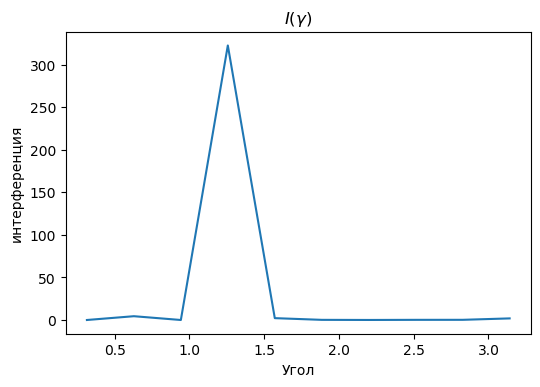

In [33]:
num_experiments = 1000
Interf_fi=[] 
fixang=0
fixang_int=[]
shag=10
for l in range(shag):
    fixang=fixang+np.pi/shag #изменение угла
    fixang_int.append(fixang) #добавление угла к массиву углов для последующего построения графика
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size)) # подсчёт среднего значения интерференции и добавление его к массиву

plt.figure(dpi=100)
plt.title('$I(\gamma)$')
plt.plot(fixang_int,Interf_fi)
plt.xlabel('Угол')
plt.ylabel('интерференция')
plt.show()

## построение графика с изменением лямбды для интерферирующих устройств 

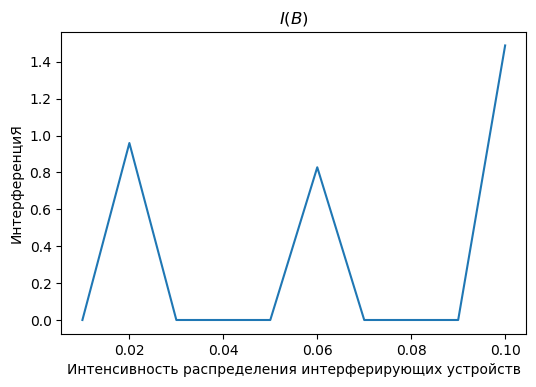

In [34]:
Interf_fi=[]
fixang=np.pi/4
poisson_lam_int = 0
poisson_lam_int_op = []

for l in range(shag):
    poisson_lam_int=poisson_lam_int+0.01
    poisson_lam_int_op.append(poisson_lam_int)
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size))

plt.figure(dpi=100)
plt.title('$I(B)$')
plt.plot(poisson_lam_int_op,Interf_fi)
plt.xlabel('Интенсивность распределения интерферирующих устройств')
plt.ylabel('ИнтерференциЯ')
plt.show()

## построение графика с изменением лямбды для блокирующих устройств

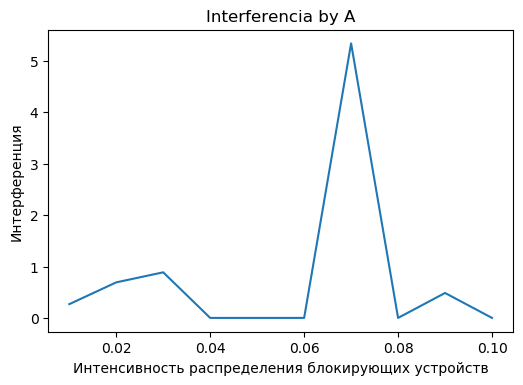

In [35]:
Interf_fi=[]
fixang=np.pi/4
poisson_lam_int = 0.07
poisson_lam_block = 0
poisson_lam_block_op = []
for l in range(shag):
    poisson_lam_block=poisson_lam_block+0.01
    poisson_lam_block_op.append(poisson_lam_block)
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size))

plt.figure(dpi=100)
plt.title('Interferencia by A')
plt.plot(poisson_lam_block_op,Interf_fi)
plt.xlabel('Интенсивность распределения блокирующих устройств')
plt.ylabel('Интерференция')
plt.show()

# Вывод

<span style="font-size:1.5em; font-family:Times New Roman">
    В круге радиуса R, центром которого является целевой приемник, 
распределены согласно Пуассоновскому равномерному точечному процессу с 
интенсивностью B интерферирующие устройства. На целевом приемнике 
расположена всенаправленная антенна, а интерферирующие устройства 
оборудованы направленными антеннами с углом диаграммы направленности $\gamma$. 
Предполагается, что все антенны сориентированы случайным образом и постоянно 
излучают сигнал с мощностью P. При этом применяется модель распространения 
сигнала Cone (аналог модели Free Space Path Loss с поправкой на коэффициент 
диаграммы направленности). В этом же круге согласно Пуассоновскому 
равномерному точечному процессу с интенсивностью A распределены 
блокирующие объекты радиуса D. Для упрощения интерферирующие устройства не 
считать блокирующими объектами.
В случае если сигнал от интерферирующего передатчика до целевого 
приемника проходит через блокирующий объект, то он не создает помех на целевом 
приемнике. Аналогично, если целевой приемник не попадает в сектор диаграммы 
направленности интерферирующего передатчика, то соответствующий 
интерферирующий сигнал тоже не создает помех.
На основе полученной модели Я построил графики среднего значения 
интерференции как функции от направленности антенн $\gamma$, интенсивности 
Пуассоновского поля источников интерферирующих устройств B, интенсивности 
Пуассоновского поля блокирующих объектов A. При построении графиков 
использовать как минимум 1000 реализаций. </span>